# Random Forrest

### 1.

In [ ]:
import pandas as pd

df = pd.read_csv("4-Telco Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
X = df.drop('Churn', axis=1)  # ویژگی‌ها
y = df['Churn']               # برچسب (آیا مشتری سرویس را قطع کرده یا نه)


In [ ]:
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

print(f"number of trees: {len(model.estimators_)}")
print(f"average trees depth: {sum(tree.tree_.max_depth for tree in model.estimators_)/len(model.estimators_):.1f}")


Train Accuracy: 1.0000
Test Accuracy: 0.7963
number of trees: 100
average trees depth: 126.3


In [ ]:
model2 = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    max_depth=70,
    random_state=42
)
model2.fit(X_train,y_train)

train_pred = model2.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)


test_pred = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)


print(f"train acc:  {train_accuracy:.4f}")
print(f"test acc: {test_accuracy:.4f}")


train acc:  0.9949
test acc: 0.7963


### 2.

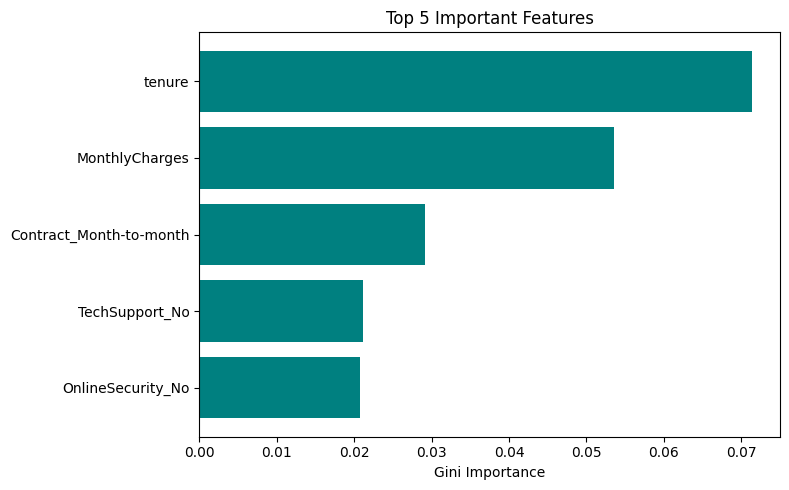

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# گرفتن اهمیت ویژگی‌ها
importances = model.feature_importances_
feature_names = X.columns

# ساخت DataFrame برای اهمیت ویژگی‌ها
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# مرتب‌سازی و انتخاب ۵ ویژگی برتر
top_5 = feature_importance_df.sort_values(by="Importance", ascending=False).head(5)

# رسم نمودار میله‌ای
plt.figure(figsize=(8, 5))
plt.barh(top_5["Feature"], top_5["Importance"], color='teal')
plt.xlabel("Gini Importance")
plt.title("Top 5 Important Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# آموزش مدل لجستیک روی کل داده
log_reg = LogisticRegression(max_iter=20)
log_reg.fit(X, y)

# استخراج ضرایب
coef_dict = dict(zip(X.columns, log_reg.coef_[0]))

# بررسی جهت اثر فقط برای ۵ ویژگی top_5
for feature in top_5["Feature"]:
    coef = coef_dict[feature]
    direction = "مثبت" if coef > 0 else "منفی"
    print(f"ویژگی '{feature}': ضریب {coef:.4f} → اثر {direction}")


ویژگی 'tenure': ضریب -0.0505 → اثر منفی
ویژگی 'MonthlyCharges': ضریب 0.0176 → اثر مثبت
ویژگی 'Contract_Month-to-month': ضریب -0.0253 → اثر منفی
ویژگی 'TechSupport_No': ضریب 0.0666 → اثر مثبت
ویژگی 'OnlineSecurity_No': ضریب 0.0662 → اثر مثبت


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# نمونه کوچکتر از داده‌ها برای سرعت بیشتر
X_train_sample = X_train.sample(n=1000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

n_estimators_list = [10, 50, 100, 200, 500]
test_accuracies = []

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, n_jobs=-1, random_state=42)
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_accuracies.append(acc)


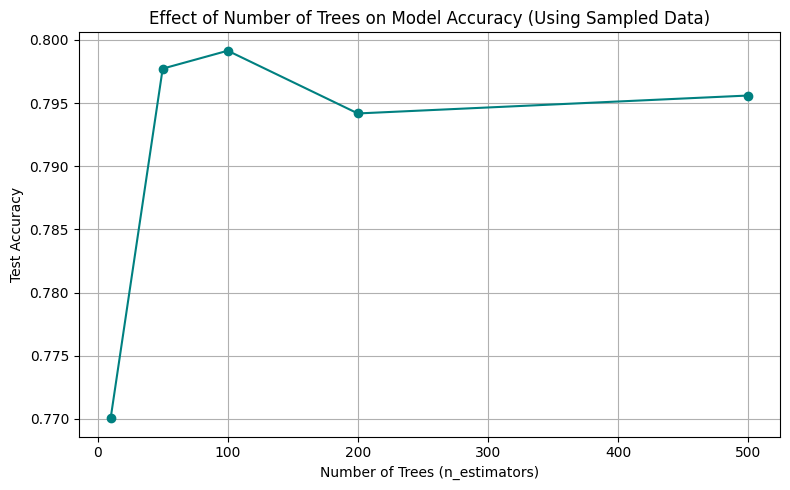

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, test_accuracies, marker='o', linestyle='-', color = 'teal')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Test Accuracy")
plt.title("Effect of Number of Trees on Model Accuracy (Using Sampled Data)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.

In [ ]:
# تعداد نمونه‌های هر کلاس در ستون Churn
class_counts = df['Churn'].value_counts()

# نسبت هر کلاس به کل داده‌ها
class_ratios = df['Churn'].value_counts(normalize=True)

print("Frequency of each class:\n", class_counts)
print("\nRatio of each class:\n", class_ratios)

Frequency of each class:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Ratio of each class:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --------- مدل اولیه (بدون class_weight) ----------
model_default = RandomForestClassifier(random_state=42)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

# --------- مدل با class_weight='balanced' ----------
model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

# --------- محاسبه متریک‌ها ----------
# اضافه کردن pos_label='Yes' برای رشته‌ای بودن برچسب‌ها
def evaluate_model(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label='Yes')
    rec = recall_score(y_true, y_pred, pos_label='Yes')
    f1 = f1_score(y_true, y_pred, pos_label='Yes')
    print(f"\n{name}")
    print("-" * len(name))
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")


evaluate_model(y_test, y_pred_default, "Default Model")
evaluate_model(y_test, y_pred_balanced, "Balanced Model")



Default Model
-------------
Accuracy:  0.7963
Precision: 0.6667
Recall:    0.4611
F1-score:  0.5452

Balanced Model
--------------
Accuracy:  0.7977
Precision: 0.6517
Recall:    0.5067
F1-score:  0.5701


### 6.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

max_features_list = ['sqrt', 'log2', 3, 5]
results = []

for mf in max_features_list:
    model = RandomForestClassifier(max_features=mf, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # برای AUC

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score((y_test == 'Yes').astype(int), y_proba)  # در صورتی که y_test از نوع object است

    results.append((mf, acc, auc))

# نمایش نتایج
for mf, acc, auc in results:
    print(f"max_features = {mf} -> Accuracy = {acc:.4f}, AUC = {auc:.4f}")


max_features = sqrt -> Accuracy = 0.7963, AUC = 0.8418
max_features = log2 -> Accuracy = 0.7956, AUC = 0.8422
max_features = 3 -> Accuracy = 0.8013, AUC = 0.8456
max_features = 5 -> Accuracy = 0.7984, AUC = 0.8419


### 7.

<ipython-input-47-5f490debb98e>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', color = 'teal')  # خط تصادفی


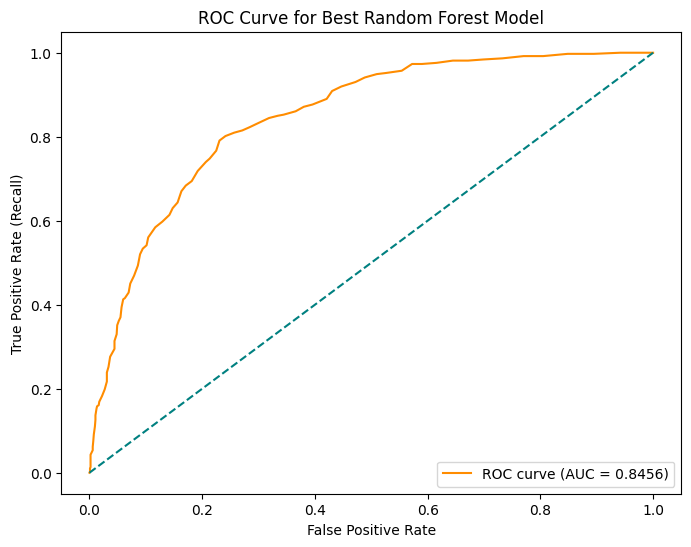

AUC = 0.8456


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

model = RandomForestClassifier(max_features=3, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Yes')  # اگر برچسب‌ها Yes/No هست
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color = 'darkorange', label=f"ROC curve (AUC = {auc_score:.4f})")
plt.plot([0,1], [0,1], 'k--', color = 'teal')  # خط تصادفی
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Best Random Forest Model")
plt.legend(loc="lower right")
plt.show()

print(f"AUC = {auc_score:.4f}")
